## En este programa integramos el problema de 2 cuerpos (P2C). 
## Todos los datos son facilmente modificables y los programas son facilmente reproducibles.

In [122]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Generamos las condiciones iniciales

In [123]:
G = 4.299e-6   # Unidades kpc*Msol^-1*(km/s)**2
eps = 0.9      #softening 

e = 0.7     # excentricidad de la orbita
p = 10.     #distancia al pericentro
a = p/(1-e) #el semieje lo definimos asi para que 
               #la particula siempre este inicialmente en 10kpc

m = np.array([5e11, 1e5]) #masas

mu = G *(m[0]+m[1])
n = np.sqrt(mu/a**3)

vp = n * a * np.sqrt((1+e)/(1-e)) #velocidad en el pericentro
# vp=0.
print vp

604.495718002


In [124]:
apo = a*(1+e)
b = a * np.sqrt(1-e**2)

In [125]:
#periodo
T = 2*pi/n
print T

0.824763092023


In [126]:
#posiciones y velocidades iniciales

pos = np.array([[0.,0.,0.],[p,0.,0.]])

vel = np.array([[0.,0.,0.],[0.,vp,0.]])


In [127]:
print pos

[[  0.   0.   0.]
 [ 10.   0.   0.]]


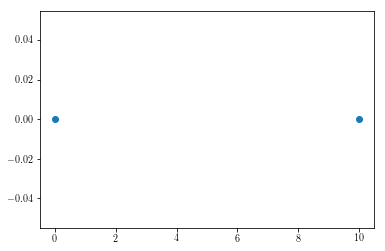

In [128]:
plt.plot(pos[:,0],pos[:,1],'o')

In [129]:
import fuerza as fz

acel = fz.aceleraciones(eps,pos[:,0],pos[:,1],pos[:,2],m)

In [130]:
print acel

[[  4.24729106e-03   0.00000000e+00   0.00000000e+00]
 [ -2.12364553e+04   0.00000000e+00   0.00000000e+00]]


### Acá definimos el paso y el numero de pasos

In [131]:
dt = 0.0001  #paso
nit = 50000 #numero de pasos

# EULER

In [163]:
import integradores as intg
posf,velf,acf = intg.euler(eps,dt,nit,m,pos,vel,acel)

In [164]:
path = '/home/omarioni/metodos_numericos/_data/P2C/euler/'

xf = np.zeros((nit/10,len(m)))
yf = np.zeros((nit/10,len(m)))
zf = np.zeros((nit/10,len(m)))

j=0
for i in np.arange(0,nit,10):
    
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    
    xf[j,:] = posf[:,0]
    yf[j,:] = posf[:,1]
    zf[j,:] = posf[:,2]
    
    j += 1

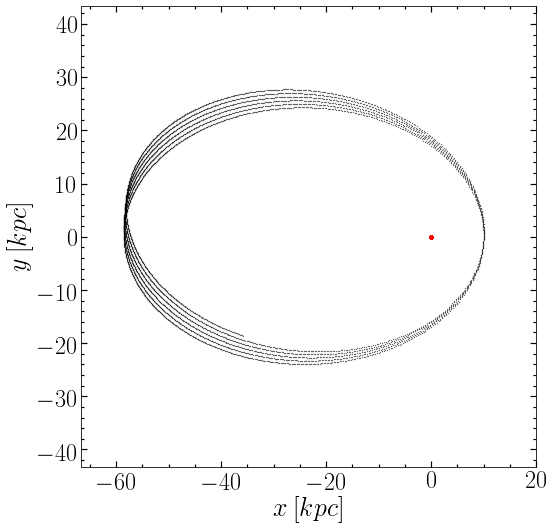

In [165]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf[:,1],yf[:,1],'.k', markersize=0.5)
ax.plot(xf[:,0],yf[:,0],'.r')
ax.set_xlim(-apo-10,p+10)
ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [135]:
pos, posf

(array([[  0.,   0.,   0.],
        [ 10.,   0.,   0.]]),
 array([[  9.00000000e-06,   6.08000000e-04,   0.00000000e+00],
        [ -3.58809890e+01,  -1.85832240e+01,   0.00000000e+00]]))

In [136]:
import fuerza as fz

U = np.zeros(nit/10)
K = np.zeros(nit/10)

path = '/home/omarioni/metodos_numericos/_data/P2C/euler/'

j=0
for i in np.arange(0,nit,10):
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    
    Uf = fz.epot(eps,posf[:,0],posf[:,1],posf[:,2],m)
    Kf = m * (velf[:,0]**2 + velf[:,1]**2 + velf[:,2]**2)

    U[j] = 0.5 * np.sum(Uf,axis=0)
    K[j] = 0.5 * np.sum(Kf,axis=0)
    j += 1


In [137]:
E = K - U
dE = (E - E[0])/abs(E[0])
time = dt * np.arange(0,nit,10)

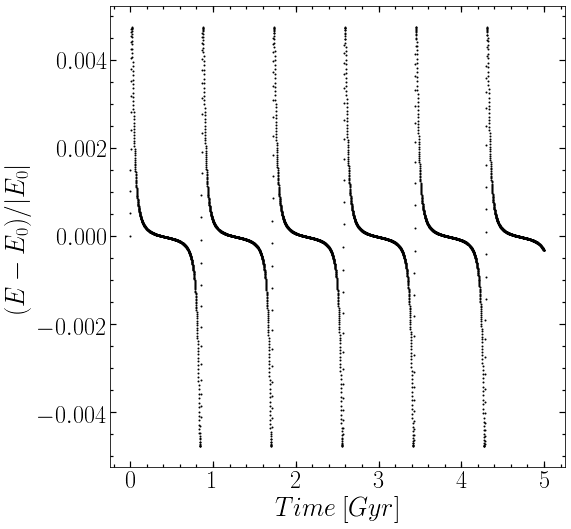

In [138]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

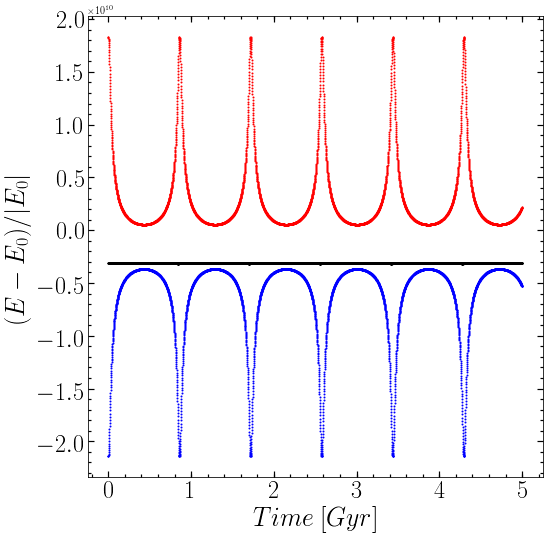

In [139]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,E,'.k', markersize=2)
ax.plot(time,K,'.r', markersize=2)
ax.plot(time,-U,'.b', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

# RUNGE

In [140]:
import integradores as intg
    
posf,velf,acf = intg.rungek(eps,dt,nit,m,pos,vel,acel)

In [166]:
path = '/home/omarioni/metodos_numericos/_data/P2C/runge/'

xf = np.zeros((nit/10,len(m)))
yf = np.zeros((nit/10,len(m)))
zf = np.zeros((nit/10,len(m)))

j=0
for i in np.arange(0,nit,10):
    
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    
    xf[j,:] = posf[:,0]
    yf[j,:] = posf[:,1]
    zf[j,:] = posf[:,2]
    
    j += 1

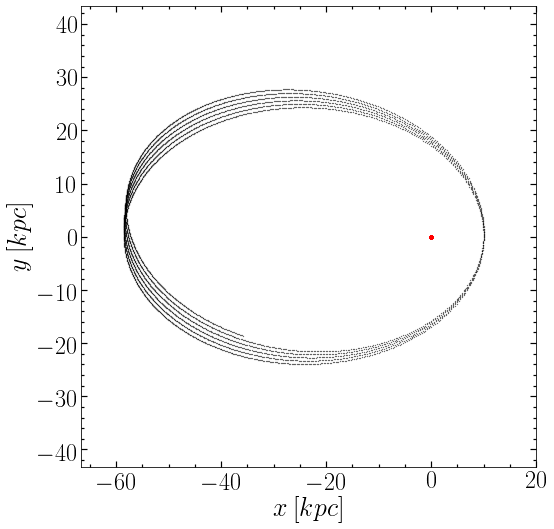

In [167]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf[:,1],yf[:,1],'.k', markersize=0.5)
ax.plot(xf[:,0],yf[:,0],'.r')
ax.set_xlim(-apo-10,p+10)
ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [143]:
import fuerza as fz

U = np.zeros(nit/10)
K = np.zeros(nit/10)

path = '/home/omarioni/metodos_numericos/_data/P2C/runge/'

j=0
for i in np.arange(0,nit,10):
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    
    Uf = fz.epot(eps,posf[:,0],posf[:,1],posf[:,2],m)
    Kf = m * (velf[:,0]**2 + velf[:,1]**2 + velf[:,2]**2)

    U[j] = 0.5 * np.sum(Uf,axis=0)
    K[j] = 0.5 * np.sum(Kf,axis=0)
    j += 1
    


In [144]:
E = K - U
dE = (E - E[0])/abs(E[0])
time = dt * np.arange(0,nit,10)

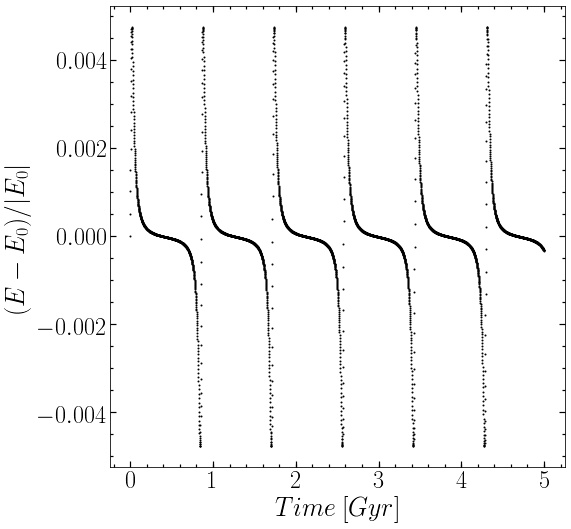

In [145]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

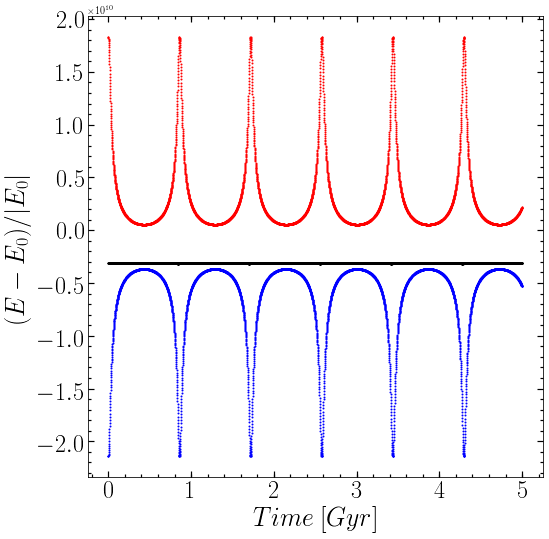

In [146]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,E,'.k', markersize=2)
ax.plot(time,K,'.r', markersize=2)
ax.plot(time,-U,'.b', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

# LEAPFROG -KDK

In [147]:
import integradores as intg
    
posf,velf,acf = intg.KDK(eps,dt,nit,m,pos,vel,acel)

In [148]:
print pos, posf

[[  0.   0.   0.]
 [ 10.   0.   0.]] [[  9.14767716e-06   6.08196873e-04   0.00000000e+00]
 [ -3.57383858e+01  -1.85057749e+01   0.00000000e+00]]


In [168]:
path = '/home/omarioni/metodos_numericos/_data/P2C/KDK/'

xf = np.zeros((nit/10,len(m)))
yf = np.zeros((nit/10,len(m)))
zf = np.zeros((nit/10,len(m)))

j=0
for i in np.arange(0,nit,10):
    
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    
    xf[j,:] = posf[:,0]
    yf[j,:] = posf[:,1]
    zf[j,:] = posf[:,2]
    
    j += 1

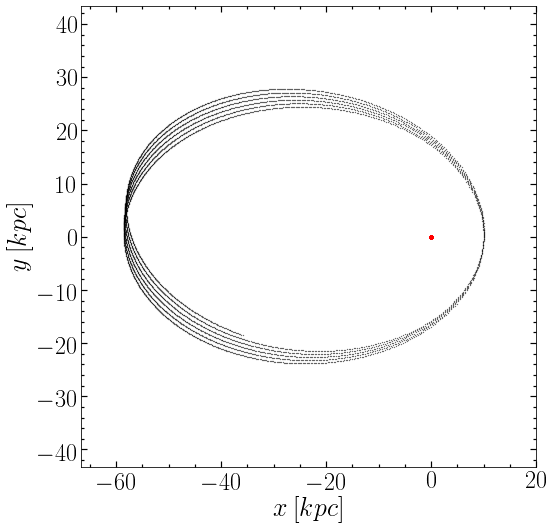

In [169]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf[:,1],yf[:,1],'.k', markersize=0.5)
ax.plot(xf[:,0],yf[:,0],'.r')
ax.set_xlim(-apo-10,p+10)
ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [151]:
import fuerza as fz

U = np.zeros(nit/10)
K = np.zeros(nit/10)

path = '/home/omarioni/metodos_numericos/_data/P2C/KDK/'

j=0
for i in np.arange(0,nit,10):
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    
    Uf = fz.epot(eps,posf[:,0],posf[:,1],posf[:,2],m)
    Kf = m * (velf[:,0]**2 + velf[:,1]**2 + velf[:,2]**2)

    U[j] = 0.5 * np.sum(Uf,axis=0)
    K[j] = 0.5 * np.sum(Kf,axis=0)
    j += 1
    


In [152]:
E = K - U
dE = (E - E[0])/abs(E[0])
time = dt * np.arange(0,nit,10)

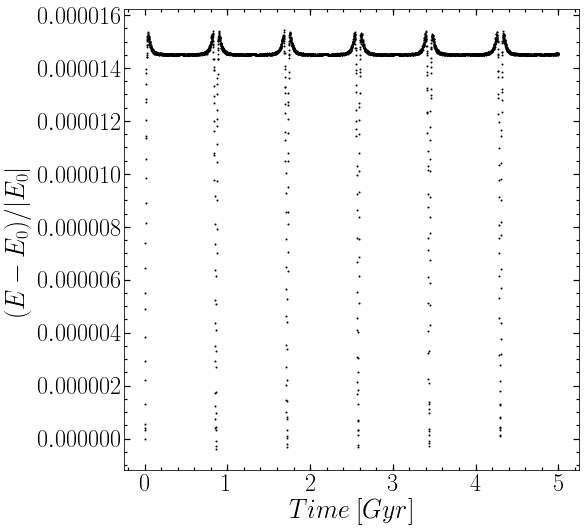

In [153]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

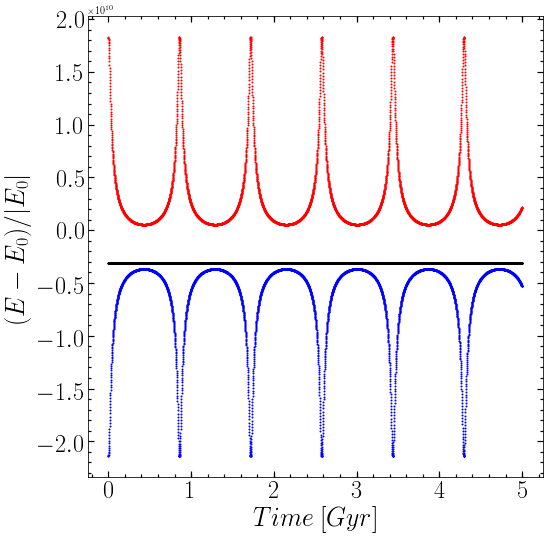

In [154]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,E,'.k', markersize=2)
ax.plot(time,K,'.r', markersize=2)
ax.plot(time,-U,'.b', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

# LEAPFROG -DKD

In [155]:
import integradores as intg
    
posf,velf,acf = intg.DKD(eps,dt,nit,m,pos,vel,acel)

In [156]:
path = '/home/omarioni/metodos_numericos/_data/P2C/DKD/'

xf = np.zeros((nit/10,len(m)))
yf = np.zeros((nit/10,len(m)))
zf = np.zeros((nit/10,len(m)))

j=0
for i in np.arange(0,nit,10):
    
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    
    xf[j,:] = posf[:,0]
    yf[j,:] = posf[:,1]
    zf[j,:] = posf[:,2]
    
    j += 1

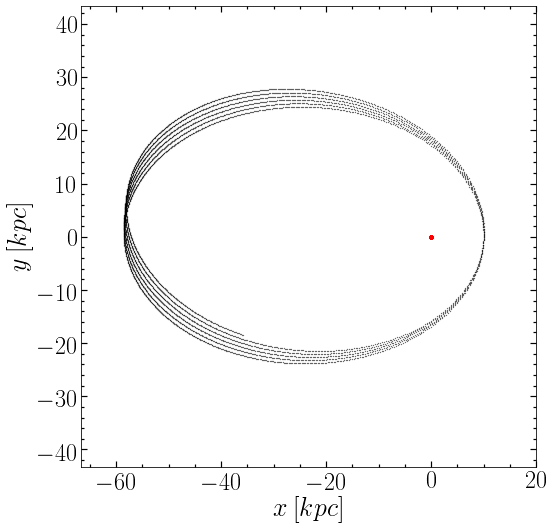

In [162]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf[:,1],yf[:,1],'.k', markersize=0.5)
ax.plot(xf[:,0],yf[:,0],'.r')
ax.set_xlim(-apo-10,p+10)
ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [158]:
import fuerza as fz

U = np.zeros(nit/10)
K = np.zeros(nit/10)

path = '/home/omarioni/metodos_numericos/_data/P2C/DKD/'

j=0
for i in np.arange(0,nit,10):
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    
    Uf = fz.epot(eps,posf[:,0],posf[:,1],posf[:,2],m)
    Kf = m * (velf[:,0]**2 + velf[:,1]**2 + velf[:,2]**2)

    U[j] = 0.5 * np.sum(Uf,axis=0)
    K[j] = 0.5 * np.sum(Kf,axis=0)
    j += 1
    
E = K - U
# print len(Uf)
#     print Uf, Kf

In [159]:
E = K - U
dE = (E - E[0])/abs(E[0])
time = dt * np.arange(0,nit,10)

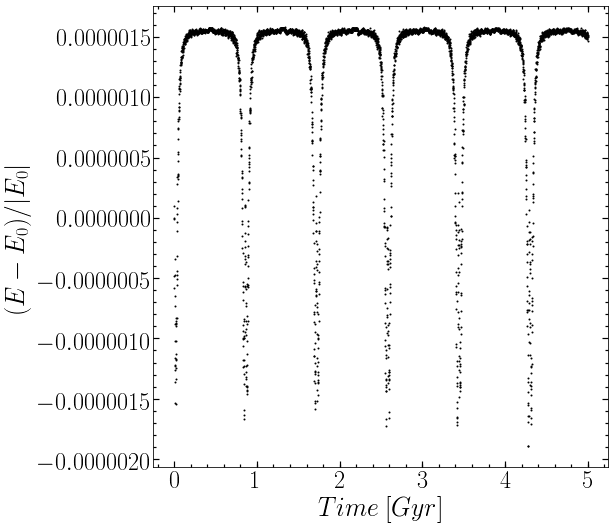

In [160]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

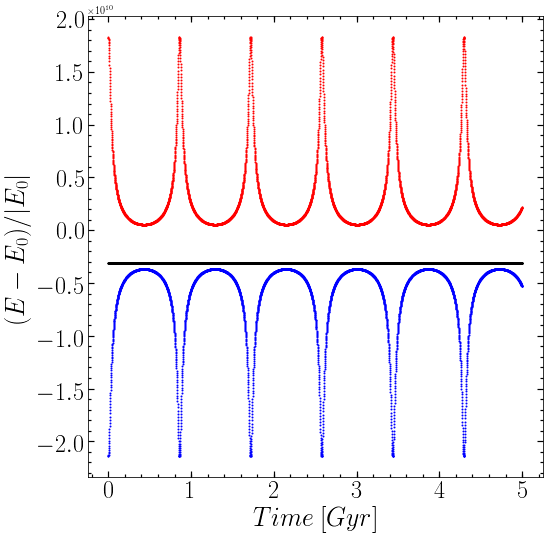

In [161]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,E,'.k', markersize=2)
ax.plot(time,K,'.r', markersize=2)
ax.plot(time,-U,'.b', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()